In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%config InlineBackend.figure_format = 'retina'

In [2]:
X_and_Y = np.load('./q4-gradient-descent.npy')
X1 = X_and_Y[:, 0]    # Shape: (900,)
X2 = X_and_Y[:, 1]    # Shape: (900,)
Y  = X_and_Y[:, 2]    # Shape: (900,)
print(X1.shape, X2.shape, Y.shape)

(900,) (900,) (900,)


### Original Data

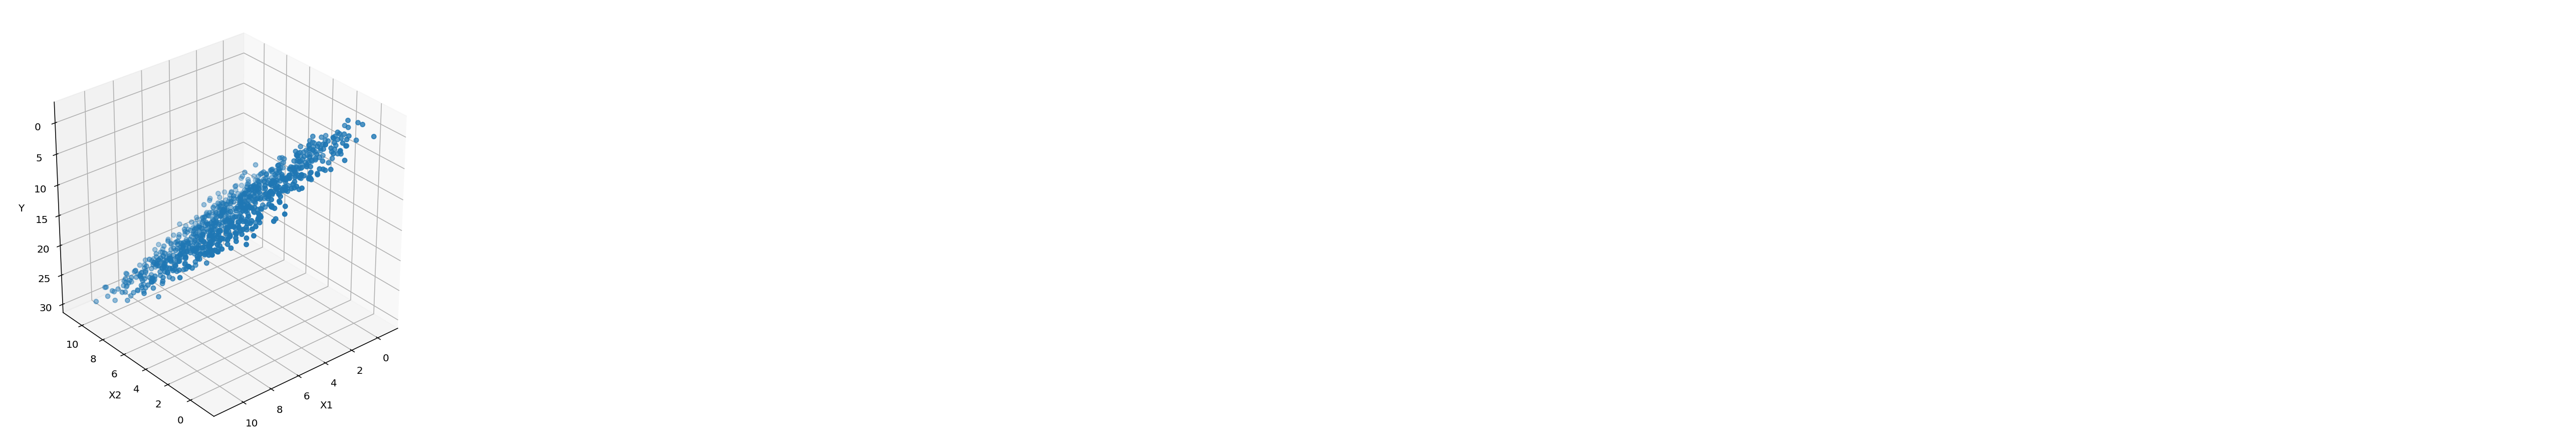

In [3]:
fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig, elev = -150, azim = 130)
ax.scatter(X1, X2, Y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

### Linear Regression Using the Closed Form

In [4]:
# Assume Y = w0 + w1 * X1 + W2 * X2 = (w0, w1, w2).(1, X1, X2) = W.X

X = np.matrix(np.hstack((np.ones((len(X1),1)),
                          X1.reshape(-1,1),
                          X2.reshape(-1,1))))  # X contains 1, X1 and X2.
W = X.T.dot(X).I.dot(X.T).dot(Y)

w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2'.format(w0, w1, w2))

Y = -0.72 + 0.99*X1 + 1.95*X2


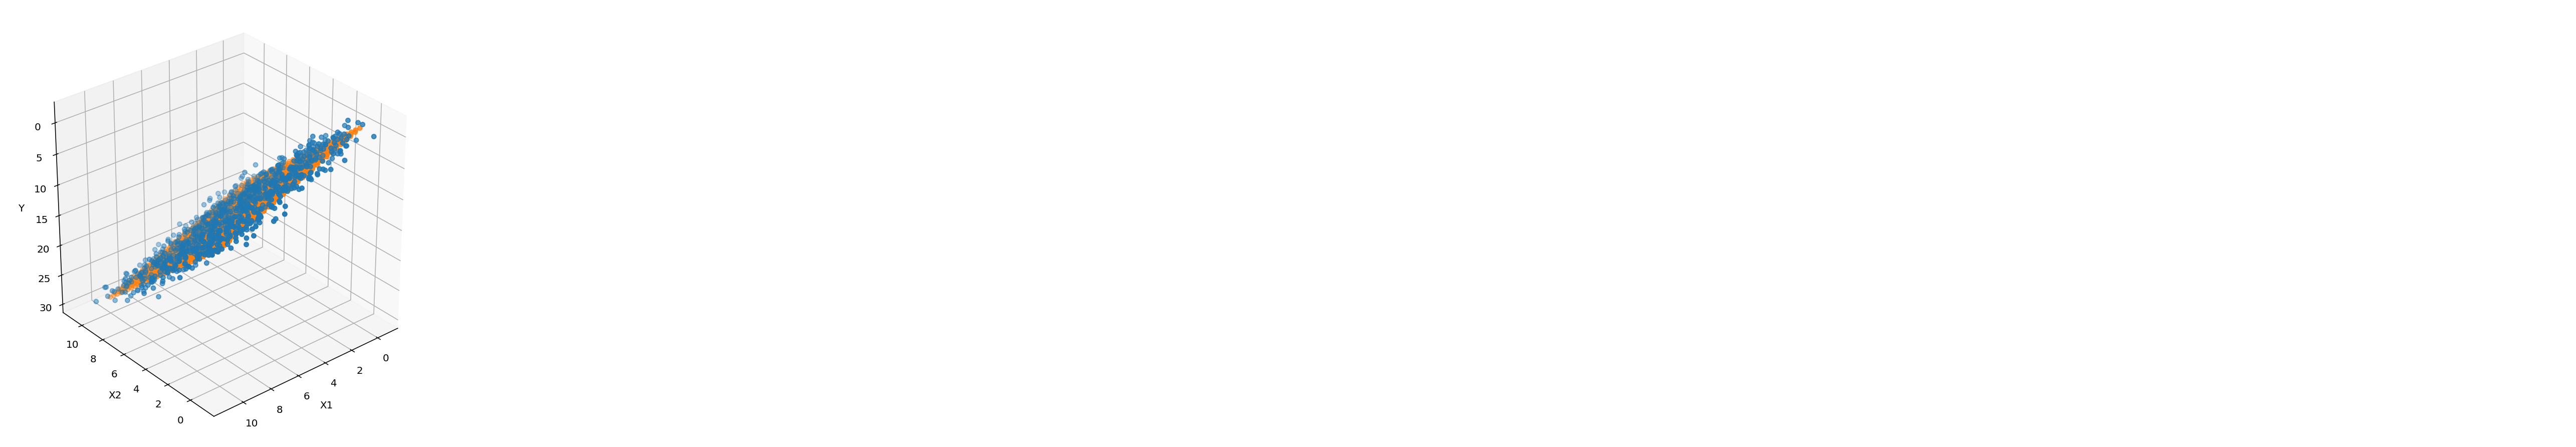

In [5]:
num = 30
X_plane_range = np.linspace(0,10,num)
X_plane_range = np.linspace(0,10,num)
X1_plane, X2_plane = np.meshgrid(X_plane_range, X_plane_range)
Y_plane = w0 + w1 * X1_plane + w2 * X2_plane

fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig, elev = -150, azim = 130)
ax.scatter(X1, X2, Y)
ax.scatter(X1_plane, X2_plane, Y_plane)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

### Gradient Descent

In [3]:
# g'(W)
def g_prime_W(X, Y, W):
    return 2*X.T.dot(X).dot(W) - 2*X.T.dot(Y)

In [4]:
# Assume Y = w0 + w1 * X1 + W2 * X2 = (w0, w1, w2).(1, X1, X2) = W.X
W = np.matrix(np.zeros((3,1)))
Y = Y.reshape(-1, 1)

print(X.shape, Y.shape, W.shape)

#while True:
for i in range(10000):
    grad = g_prime_W(X, Y, W)
    W_new = W - 0.000001 * grad
    if np.linalg.norm(W_new - W, ord = 1) < 0.00001:
        print(i)
        break
    W = W_new
    
w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2'.format(w0, w1, w2))

NameError: name 'np' is not defined

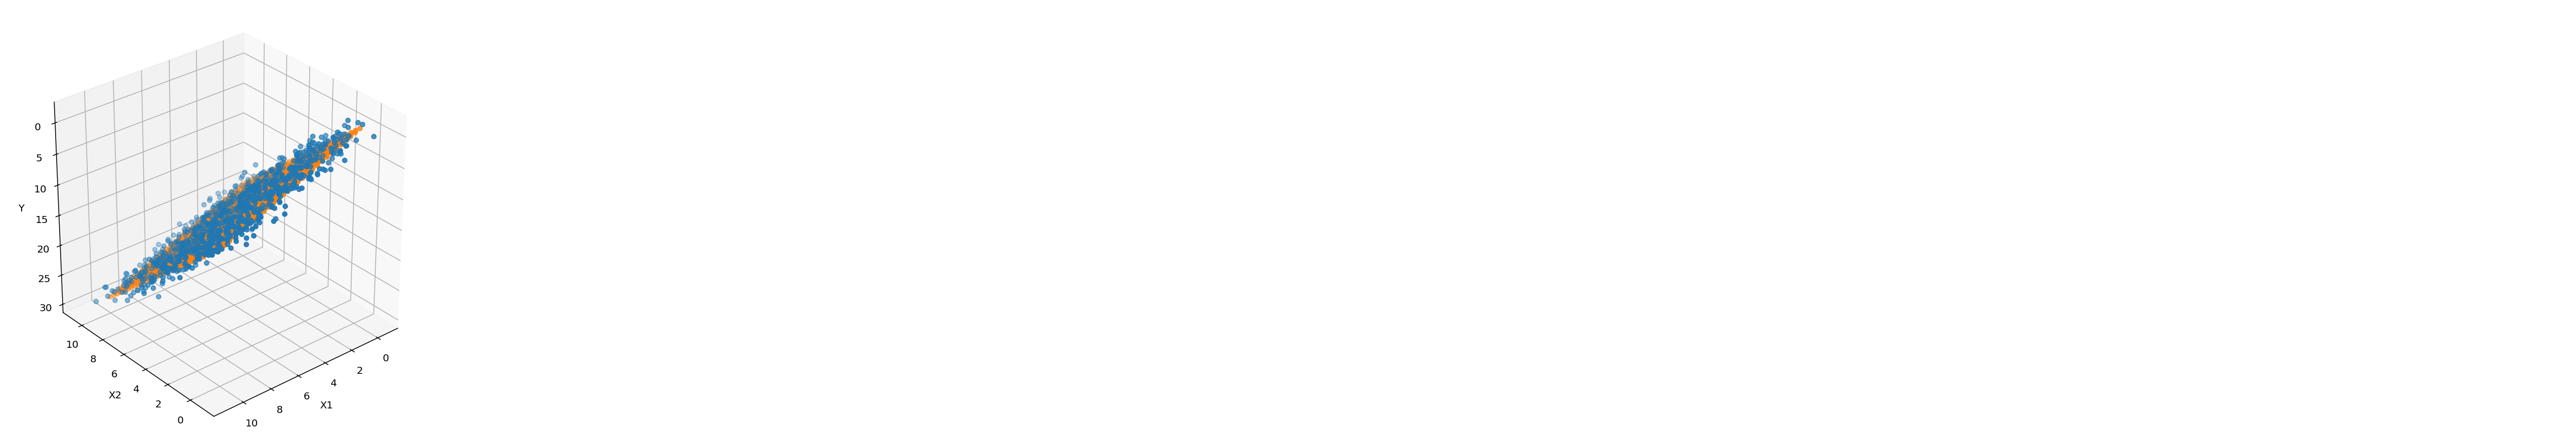

In [8]:
X_plane_range = np.linspace(0,10,num)
X_plane_range = np.linspace(0,10,num)
X1_plane, X2_plane = np.meshgrid(X_plane_range, X_plane_range)
Y_plane = w0 + w1 * X1_plane + w2 * X2_plane

fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig, elev = -150, azim = 130)
ax.scatter(X1, X2, Y)
ax.scatter(X1_plane, X2_plane, Y_plane)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()